In [1]:
import time
import os
from typing import List

import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import preprocessing.baseline_preprocessing
import preprocessing.dimensional_reduction

In [2]:
X_train, X_test, y_train, y_test, column = data_preprocess.get_processed_train_test('./data/', True)
col = column[column != 'Price']
X_train = pd.DataFrame(X_train, columns=col)
y_train = pd.Series(y_train)
X_test = pd.DataFrame(X_test, columns=col)
y_test = pd.Series(y_test)

Backward Test
Total elapsed time: 18.673457622528076 seconds.


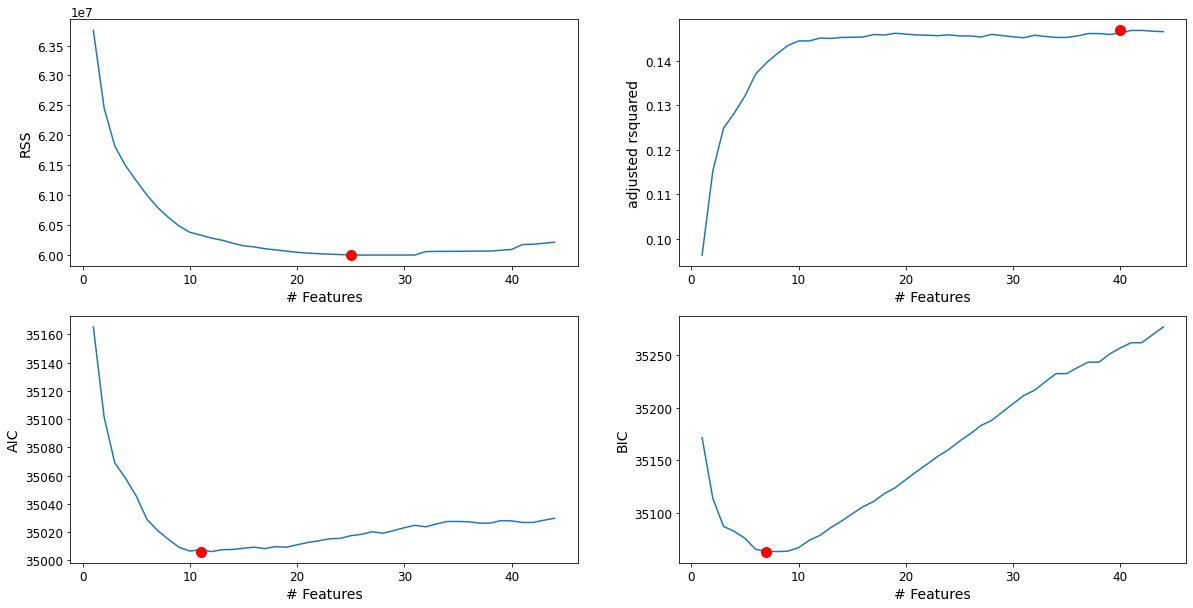

In [4]:
backMdels = dimensional_reduction.subsetSelection(X_train, y_train, X_test, y_test, 'Backward', True)

Forward Test
Total elapsed time: 10.003536939620972 seconds.


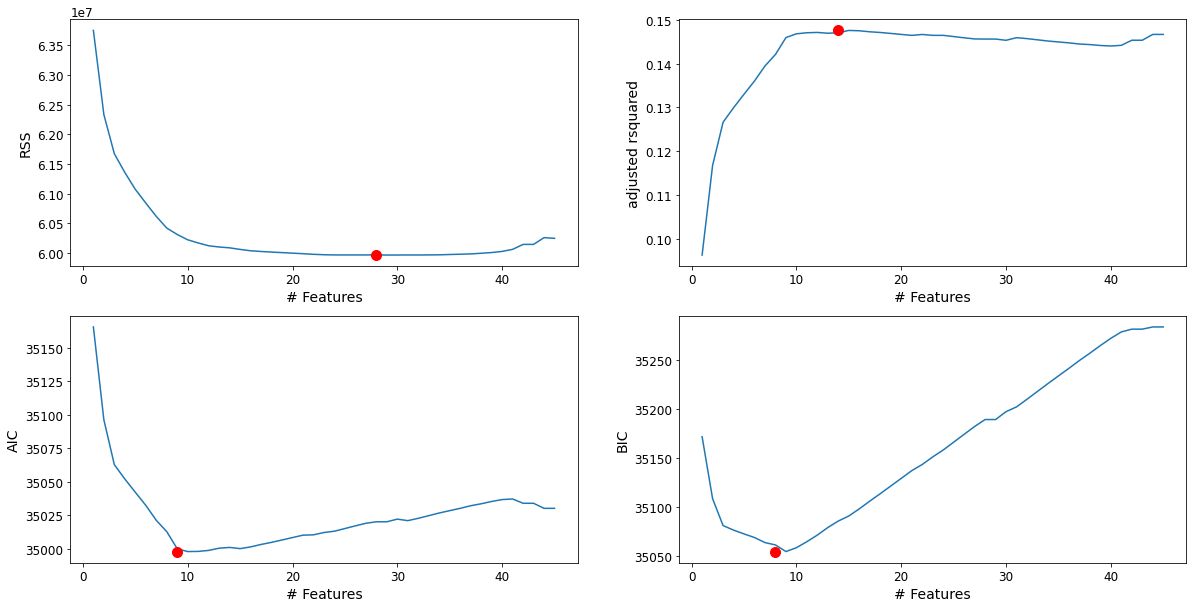

In [5]:
forwModels = dimensional_reduction.subsetSelection(X_train, y_train, X_test, y_test, 'Forward', True)

In [1]:
from preprocessing.baseline_preprocessing import get_baseline_preprocessed_train_test
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
X_train, X_test, Y_train, Y_test, columns = get_baseline_preprocessed_train_test(
        path_to_folder='data',
        remove_outliers=True,
        imputing_missing_values=False,
    )
pca = PCA()
X_train = pca.fit_transform(X_train)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (45,).

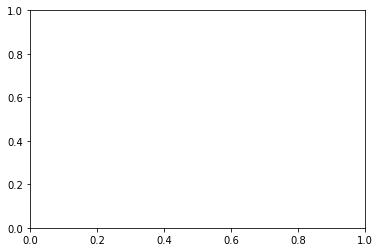

In [3]:
plt.bar(range(1,14), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [2]:
from preprocessing.main_preprocessing import preprocess
from preprocessing.dimensional_reduction import subsetSelection

X_train, X_test, Y_train, Y_test, columns = preprocess(
    path_to_folder='data',
    remove_outliers=True,
    imputing_missing_values=False,
    rescaling=True,
    pca=False,
    pls=False,
    forward_selection=False,
    backward_selection=False,
)
subsetSelection(X_train, Y_train, columns, typeSelection="Backward")

Backward Test
Total elapsed time: 103.9423258304596 seconds.


('Is Superhost',
 'Latitude',
 'Longitude',
 'Accomodates',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Min Nights',
 'Neighborhood Group_Charlottenburg-Wilm.',
 'Neighborhood Group_Friedrichshain-Kreuzberg',
 'Neighborhood Group_Mitte',
 'Neighborhood Group_NeukÃ¶lln',
 'Neighborhood Group_Pankow',
 'Neighborhood Group_Reinickendorf',
 'Neighborhood Group_Tempelhof - SchÃ¶neberg',
 'Neighborhood Group_Treptow - KÃ¶penick',
 'Property Type_Apartment',
 'Property Type_Boutique hotel',
 'Property Type_Hostel',
 'Property Type_Hotel',
 'Property Type_Loft',
 'Property Type_Serviced apartment',
 'Room Type_Entire home/apt',
 'Room Type_Private room',
 'Dist_ALEXANDERPLATZ',
 'Dist_BRANDEBOURG',
 'Dist_GENDARMENMARKT')

In [3]:
subsetSelection(X_train, Y_train, columns, typeSelection="Forward")

Forward Test
Total elapsed time: 67.60023784637451 seconds.


['Accomodates',
 'Room Type_Entire home/apt',
 'Bathrooms',
 'Property Type_Hotel',
 'Bedrooms',
 'Dist_GENDARMENMARKT',
 'Guests Included',
 'Property Type_Loft',
 'Neighborhood Group_NeukÃ¶lln',
 'Is Superhost',
 'Neighborhood Group_Charlottenburg-Wilm.',
 'Property Type_Serviced apartment',
 'Dist_BRANDEBOURG',
 'Dist_ALEXANDERPLATZ',
 'Property Type_Boutique hotel',
 'Neighborhood Group_Mitte',
 'Neighborhood Group_Treptow - KÃ¶penick',
 'Min Nights',
 'Latitude',
 'Property Type_Hostel',
 'Property Type_Apartment',
 'Neighborhood Group_Lichtenberg',
 'Neighborhood Group_Marzahn - Hellersdorf',
 'Room Type_Shared room',
 'Property Type_House',
 'Neighborhood Group_Pankow',
 'Property Type_Condominium',
 'Room Type_Private room']